In [906]:
# Importing needed libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# %matplotlib inline

In [907]:
# Importing and loading data
data = pd.read_csv("C:/Users/Idris/OneDrive/Documents/Azure DS/flights.csv")
data.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [908]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

In [909]:
data.shape

(271940, 20)

In [910]:
# Check the basic statistics of numerical columns
data.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,269179.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.201134,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.400849,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


Change the DayOfWeek, DayofMonth, Month and Year into Categorical variables

In [911]:
to_cat = ["DayOfWeek", "DayofMonth", "Month", "Year", "OriginAirportID", "DestAirportID", "DepDel15", 
          "ArrDel15", "Cancelled"]

data[to_cat] = data[to_cat].astype("object")

In [912]:
# Numerical Columns
num_col = data.select_dtypes("number").columns
num_col

Index(['CRSDepTime', 'DepDelay', 'CRSArrTime', 'ArrDelay'], dtype='object')

In [913]:
# Categorical Columns
cat_col = data.select_dtypes("object").columns
cat_col

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState', 'DepDel15',
       'ArrDel15', 'Cancelled'],
      dtype='object')

In [914]:
# Check the missing columns
data.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

We see that the missing Column "DepDel15" is dependent literally on the column "DepDelay". Thus, we could compare them to sort out missing values

In [915]:
# for i in data["DepDelay"]:
#     if i > 15:
#         data["DepDel15"] = data["DepDel15"].fillna(value = 1)
#     else: 
#         data["DepDel15"].fillna(value = 0)

# data["DepDel15"] =  data["DepDel15"].apply(lambda row: 1 if np.isnan(row["DepDel15"]))

# Imputaing the missing values
data['temp'] = np.where(data.DepDelay > 15, 1, 0)
data["DepDel15"] = data["DepDel15"].fillna(data.temp).astype(int)
data.drop('temp', axis=1, inplace=True)

In [916]:
data.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [917]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Year               271940 non-null  object
 1   Month              271940 non-null  object
 2   DayofMonth         271940 non-null  object
 3   DayOfWeek          271940 non-null  object
 4   Carrier            271940 non-null  object
 5   OriginAirportID    271940 non-null  object
 6   OriginAirportName  271940 non-null  object
 7   OriginCity         271940 non-null  object
 8   OriginState        271940 non-null  object
 9   DestAirportID      271940 non-null  object
 10  DestAirportName    271940 non-null  object
 11  DestCity           271940 non-null  object
 12  DestState          271940 non-null  object
 13  CRSDepTime         271940 non-null  int64 
 14  DepDelay           271940 non-null  int64 
 15  DepDel15           271940 non-null  int32 
 16  CRSArrTime         2

Lets correct the arrival and departure time; adding delimeters

Lets Check the distributionof the Numerical Columns

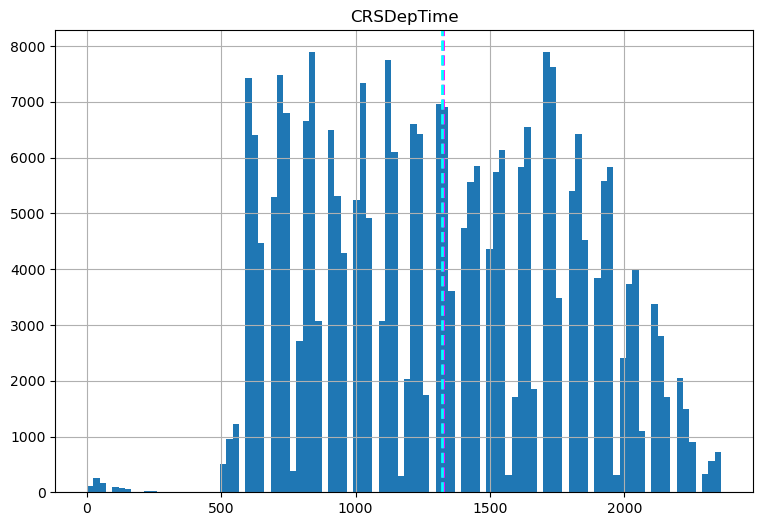

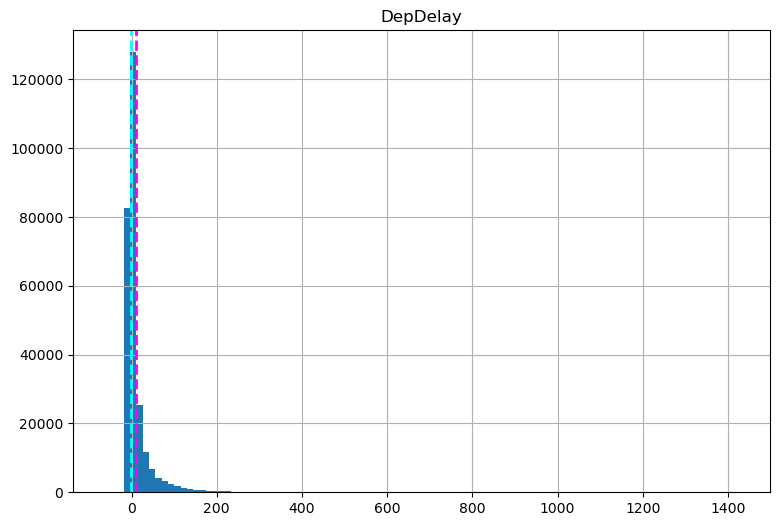

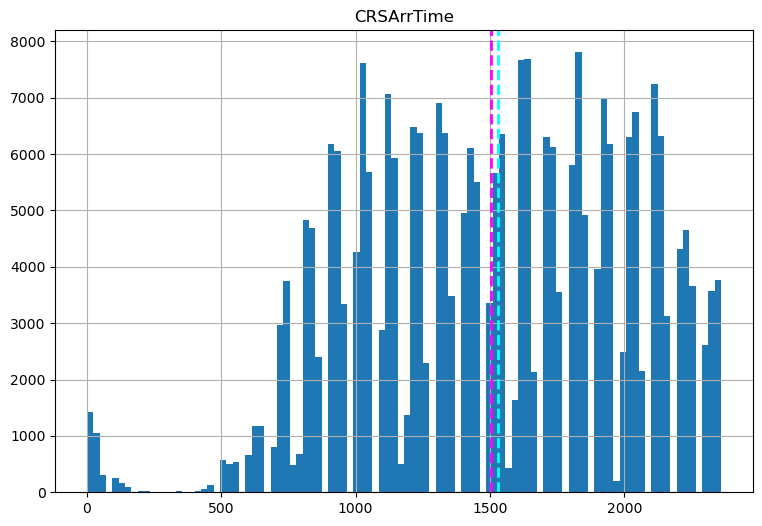

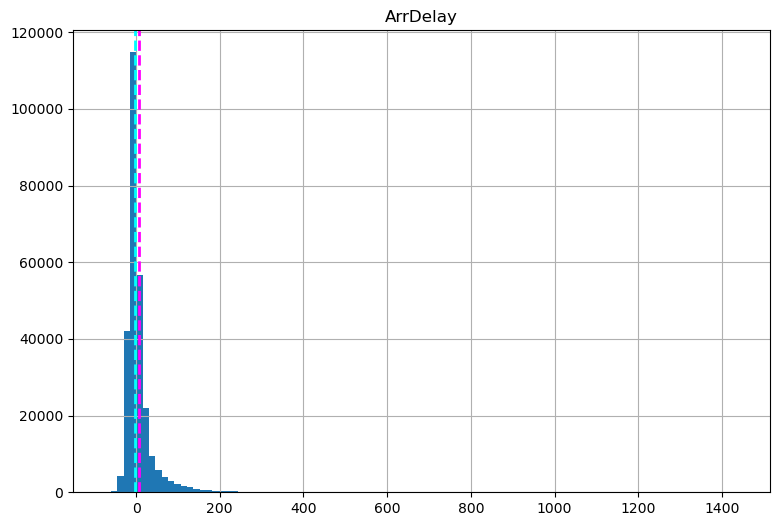

In [918]:
# Plot a histogram for each numeric feature
for col in num_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

We would notice that DepDelay and ArrDelay variables seem to be the odd ones out (Skewed distribution). Lets take a closer look at those to investigate the outliers.

We build a function that can be used for any numerical column

In [919]:
data[["ArrDelay", "DepDelay"]].corr()

,ArrDelay,DepDelay
ArrDelay,1.000000,0.938822
DepDelay,0.938822,1.000000


In [920]:
def show_distribution(var):

    # Get statistics
    min_val = data[var].min()
    max_val = data[var].max()
    mean_val = data[var].mean()
    med_val = data[var].median()
    mod_val = data[var].mode()[0]


    print("Minimum: {:.2f}\nMaximum: {:.2f}\nMean: {:.2f}\nMedian: {:.2f}\nMode: {:.2f}\n".format(
    min_val, max_val, mean_val, med_val, mod_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (9,12))

    # plot an histogram
    ax[0].hist(data[var])
    ax[0].set_ylabel('Frequency')
    ax[0].set_xlabel(var)

    # Add lines for the statistics
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

 

    # Add a title to the Figure
    fig.suptitle('Data Distribution of ' + var)
    
    # create boxplot
    ax[1].boxplot(data[var], vert = False)
    ax[1].set_xlabel(var)

    
    # Show the figure
    fig.show()

Minimum: -63.00
Maximum: 1425.00
Mean: 10.35
Median: -1.00
Mode: -3.00



C:\Users\Idris\AppData\Local\Temp\ipykernel_43744\2368959628.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


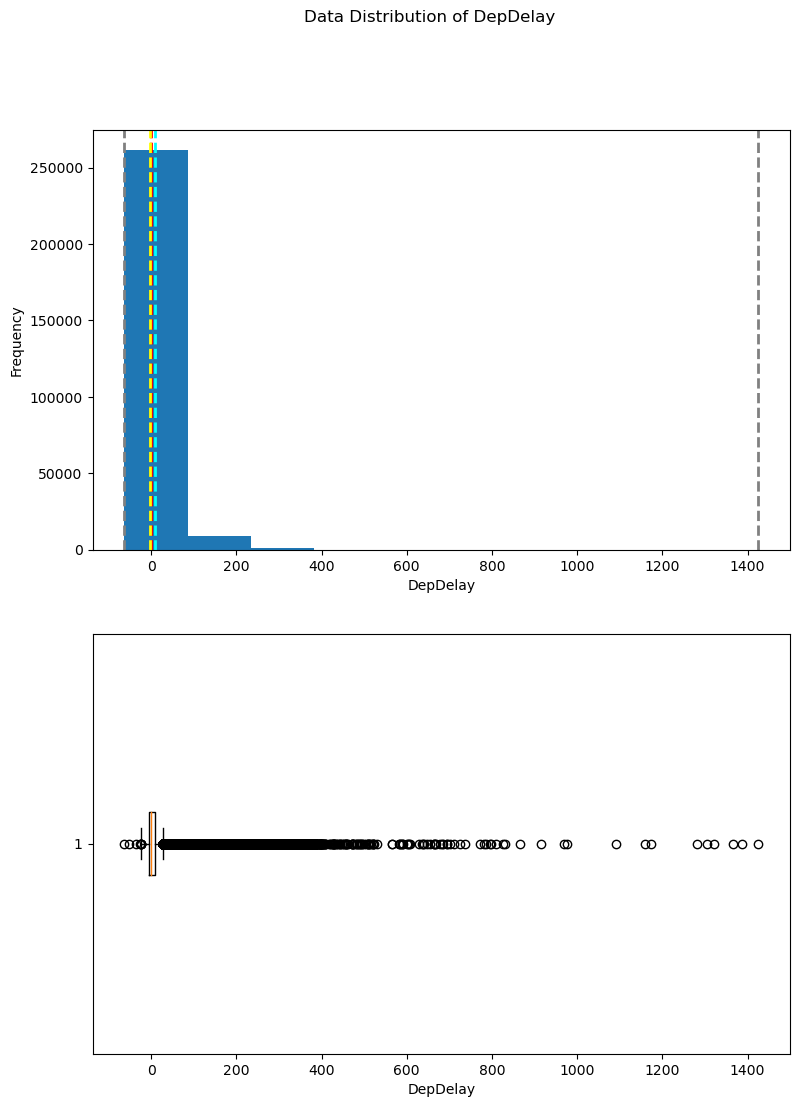

In [921]:
show_distribution("DepDelay")

Minimum: -75.00
Maximum: 1440.00
Mean: 6.50
Median: -3.00
Mode: 0.00



C:\Users\Idris\AppData\Local\Temp\ipykernel_43744\2368959628.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


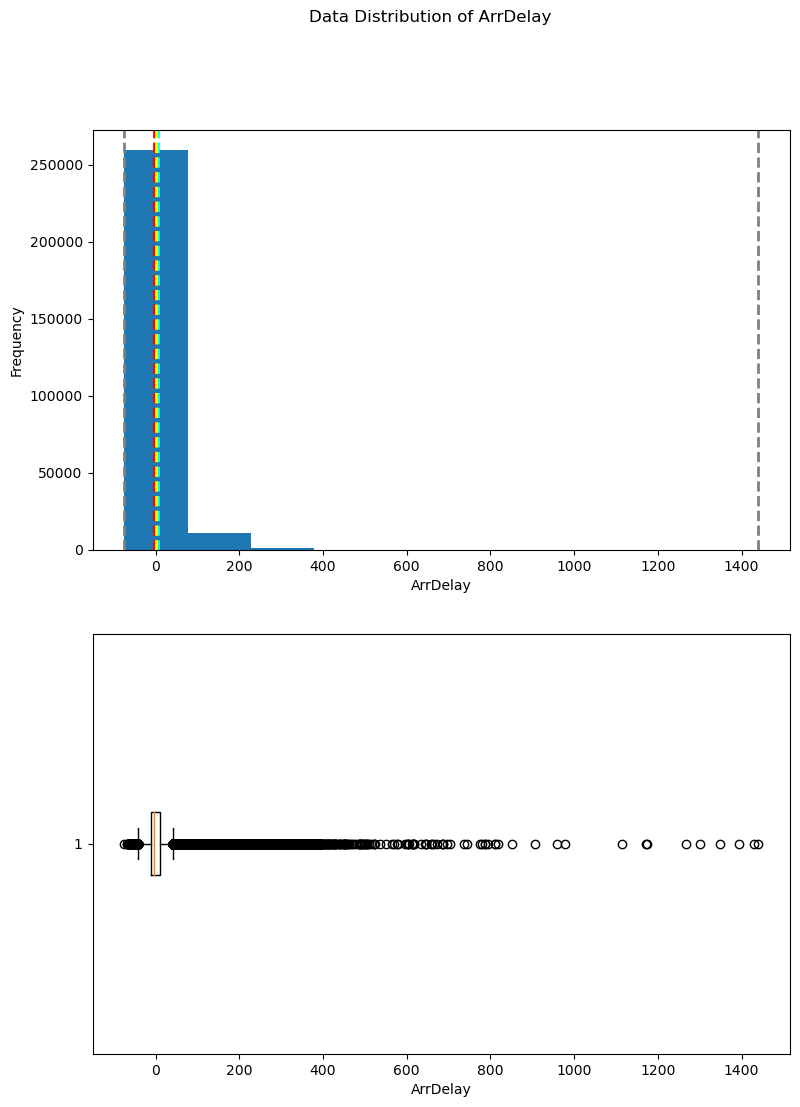

In [922]:
show_distribution("ArrDelay")

These charts shows we have a very ridiculous outliers in variable DepDelay. Lets check other columns

Since the Visuals is a bit difficult to see, lets check the Quantile values

In [923]:
def what_quantiles(var):
    quantiles = [1, 25, 75, 90, 99]
    for i in quantiles:
        n_quantile = data[var].quantile(i/100)
        print("{}th Quantile: {}".format(i, n_quantile))
    

for i in ["ArrDelay", "DepDelay"]:
    print("Quantiles for: {}".format(i))
    what_quantiles(i)
    print("\n")

Quantiles for: ArrDelay
1th Quantile: -33.0
25th Quantile: -11.0
75th Quantile: 10.0
90th Quantile: 38.0
99th Quantile: 169.0


Quantiles for: DepDelay
1th Quantile: -12.0
25th Quantile: -4.0
75th Quantile: 9.0
90th Quantile: 37.0
99th Quantile: 166.0




We see that the 1st percentile is still close to the minimum but the 99th percentile is off the max value. 
We could take this off as outlier

Lets take a look at the categorical variables

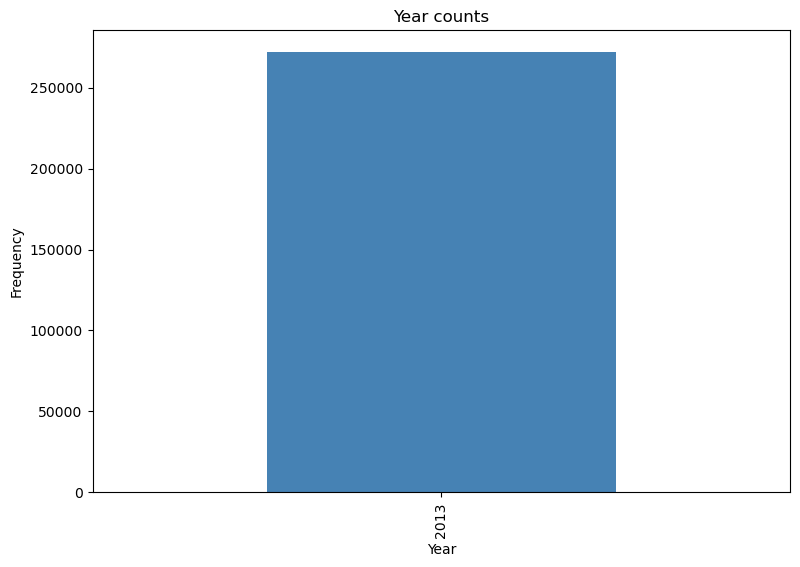

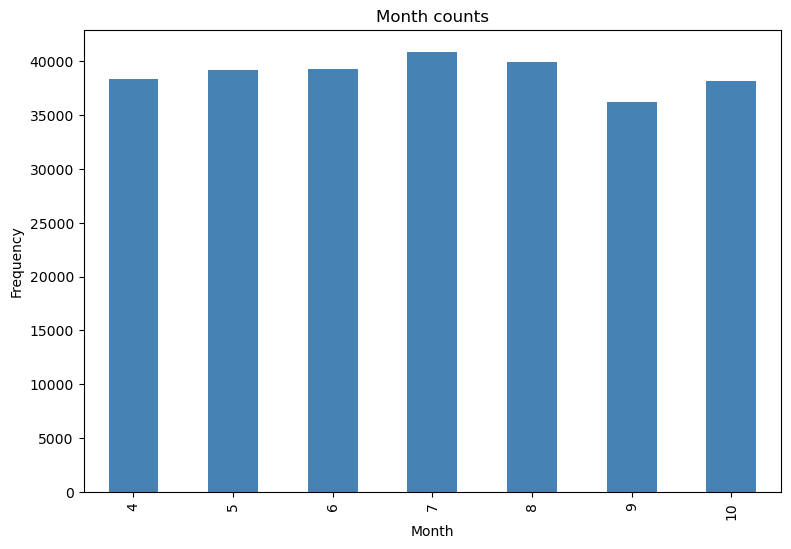

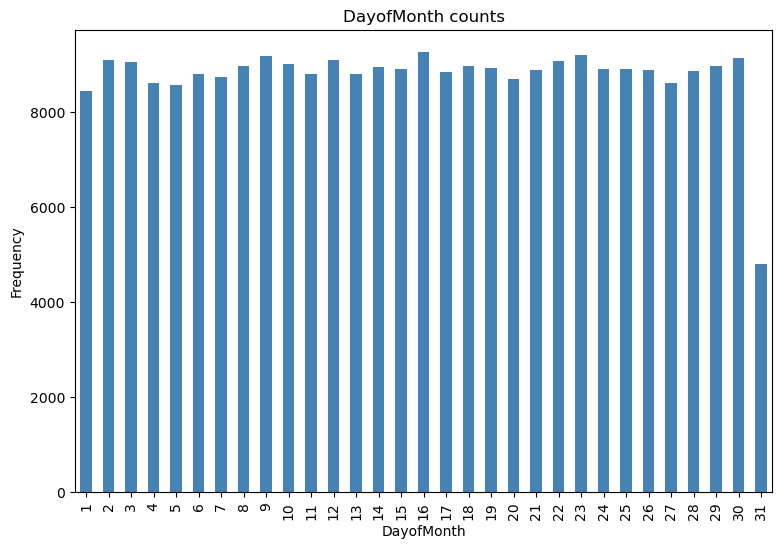

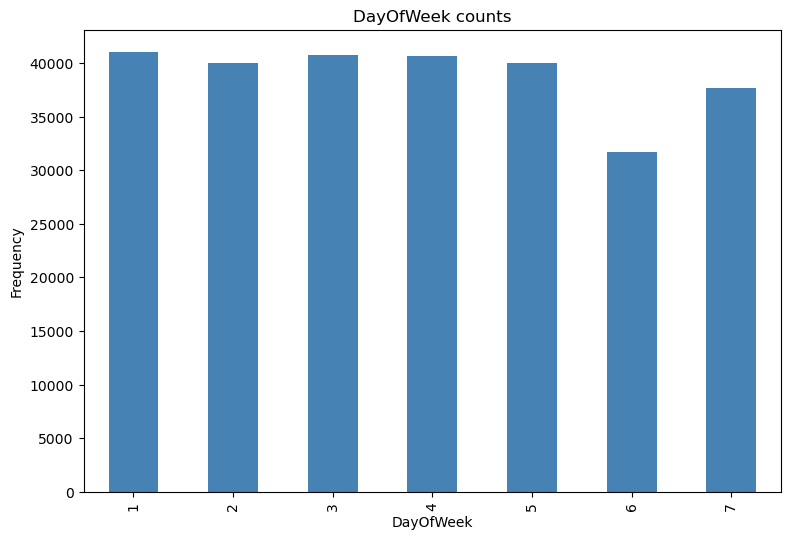

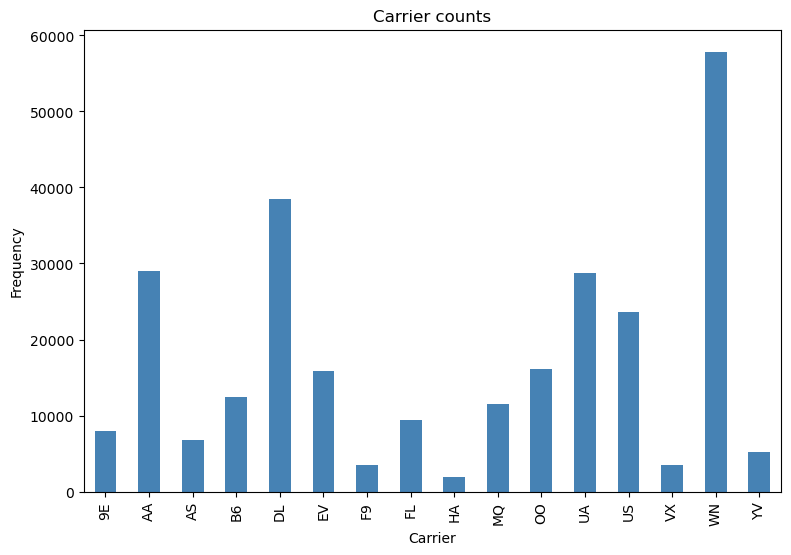

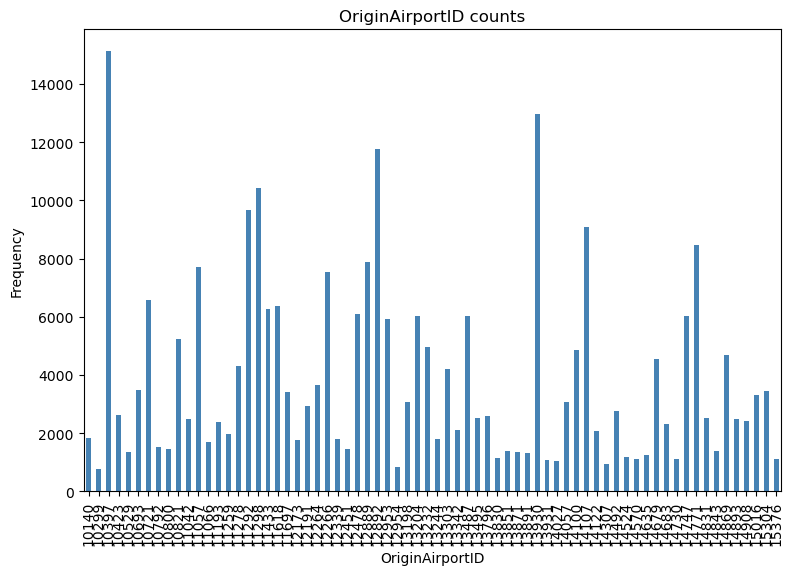

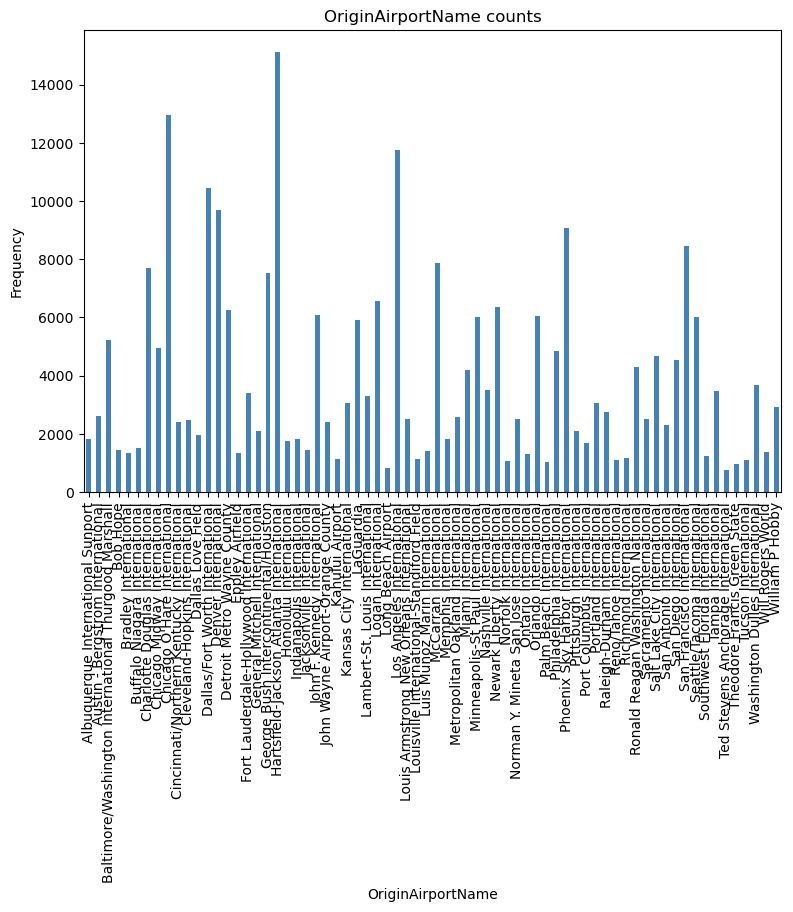

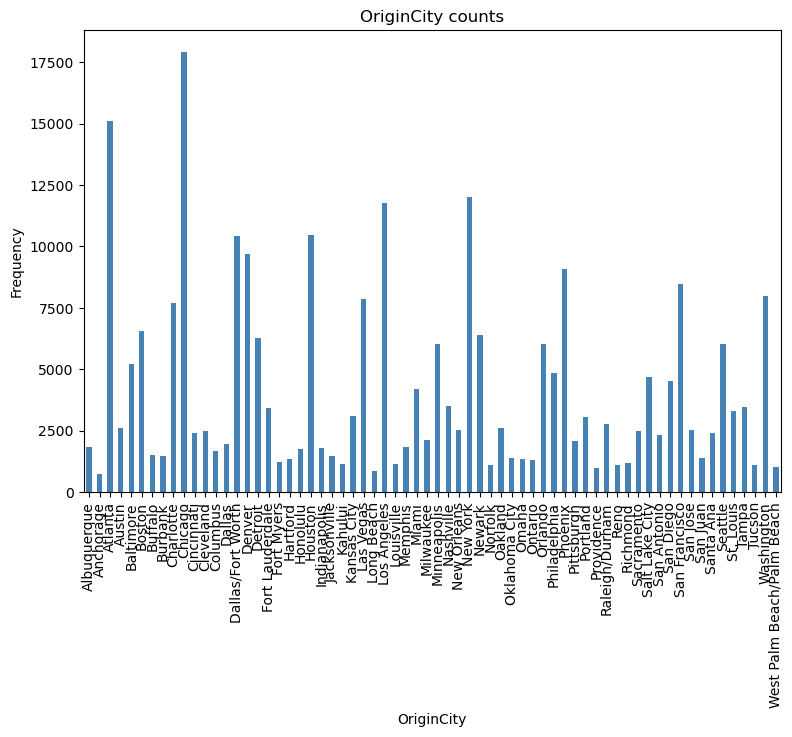

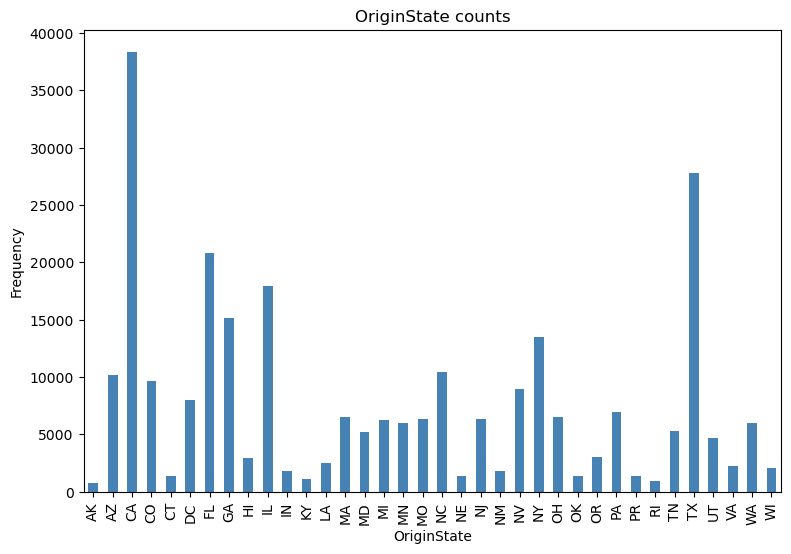

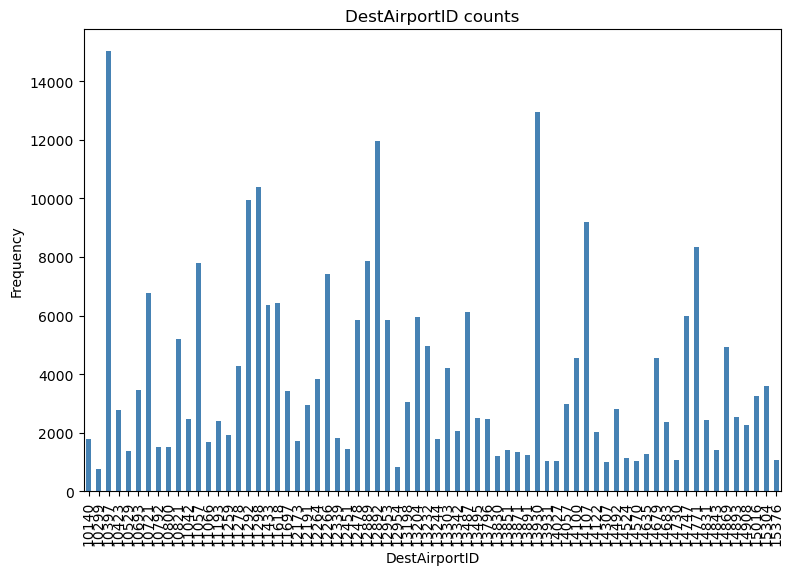

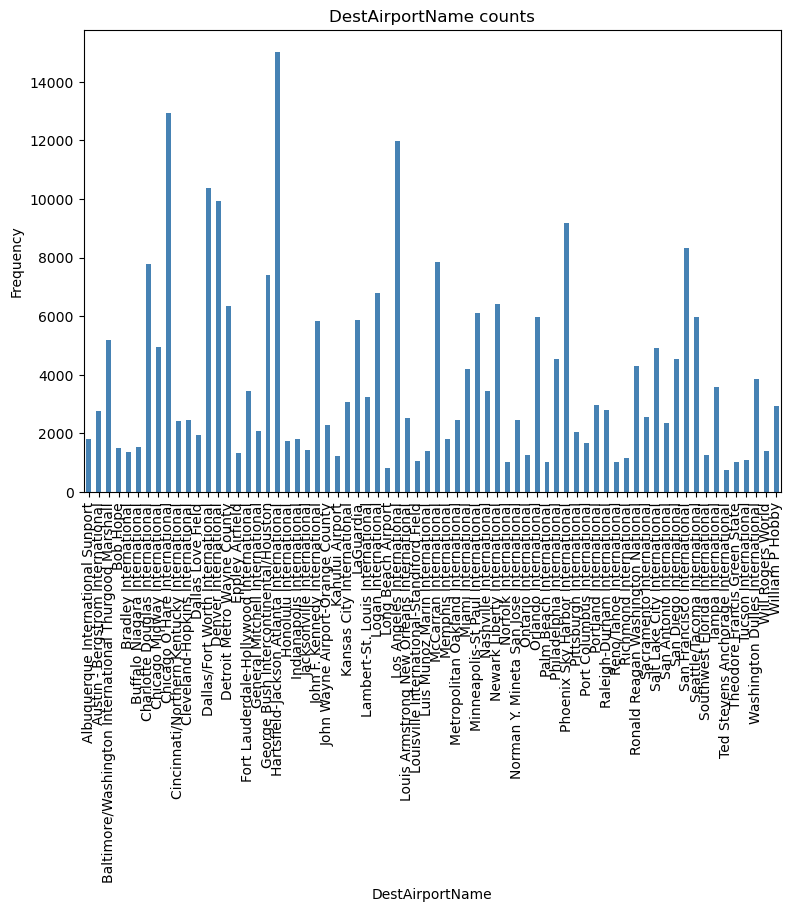

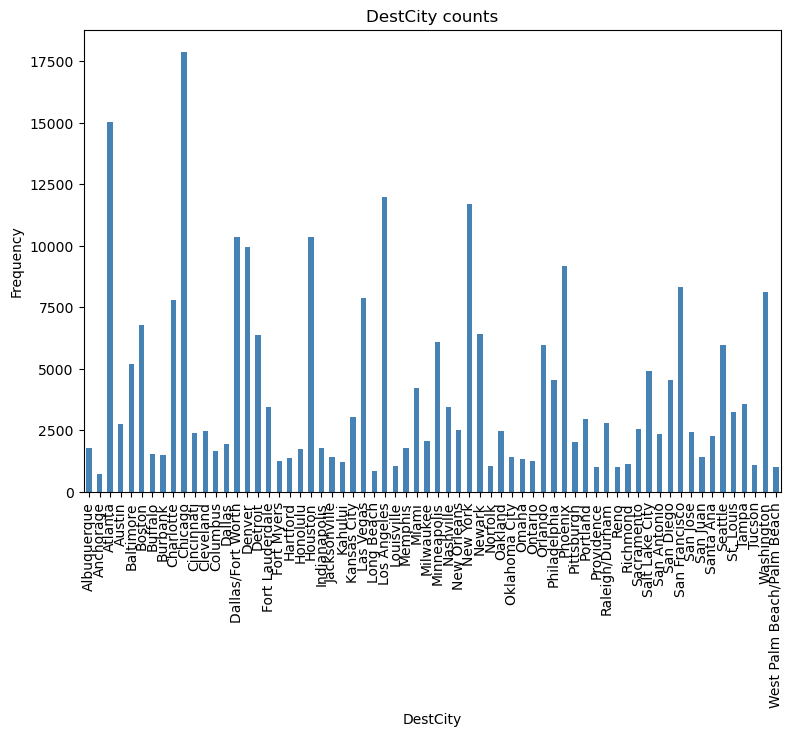

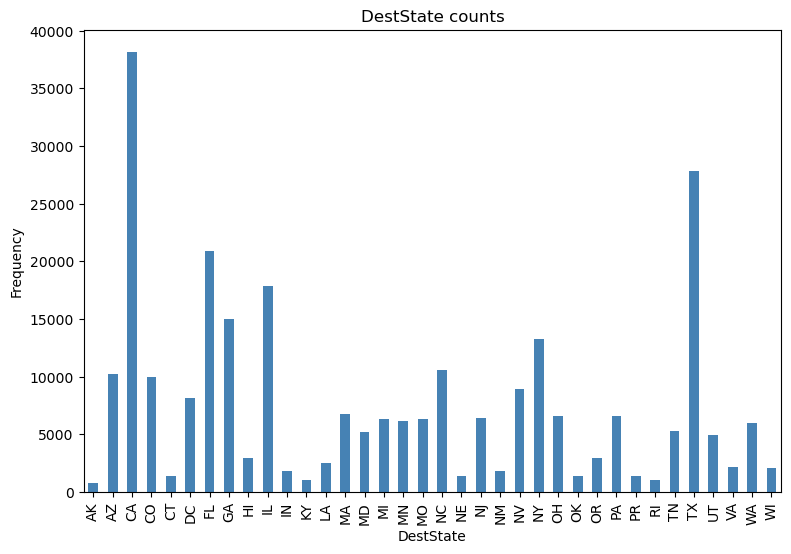

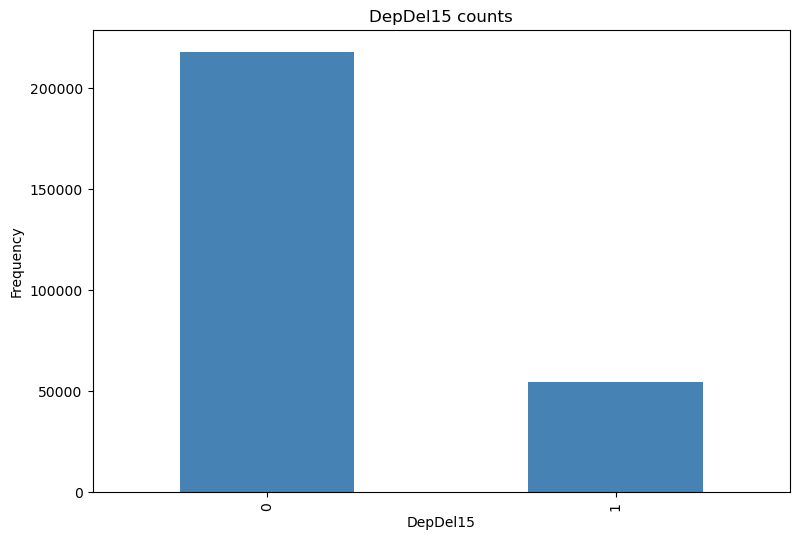

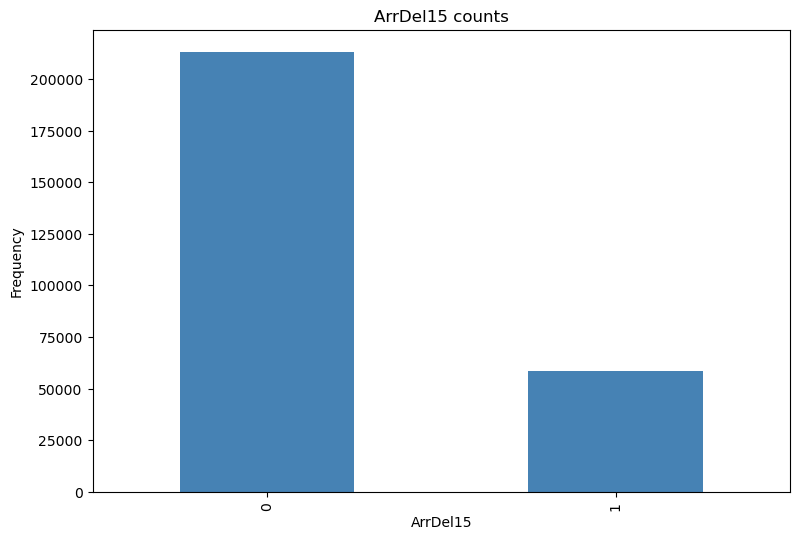

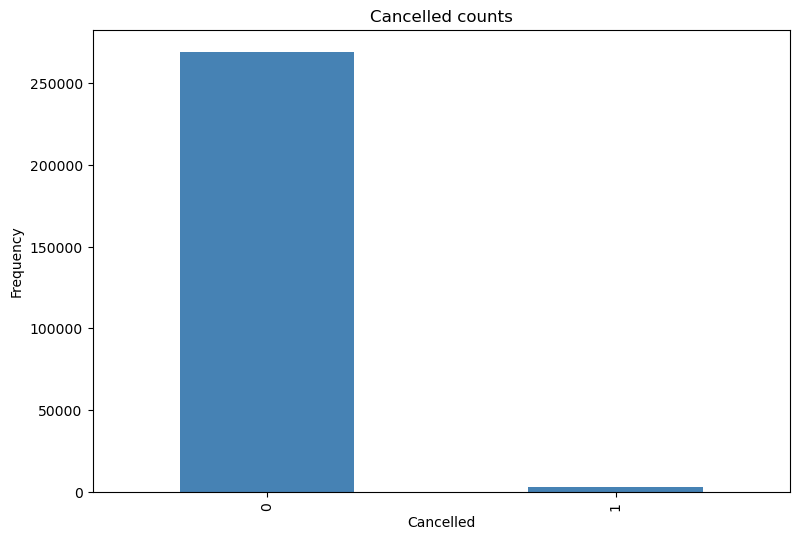

In [924]:
# plot a bar plot for each categorical feature count

for col in cat_col:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

We can see from the plots that several of the categorical variables have high cardinality.

In [925]:
q99 = data["DepDelay"].quantile(0.99)
q01 = data["DepDelay"].quantile(0.01)

data = data[(data["DepDelay"] < q99) & (data["DepDelay"] > q01)]
data.shape

(266319, 20)

## EXPLORATORY ANALYSIS

Minimum: -11.00
Maximum: 165.00
Mean: 8.22
Median: -1.00
Mode: -3.00



C:\Users\Idris\AppData\Local\Temp\ipykernel_43744\2368959628.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


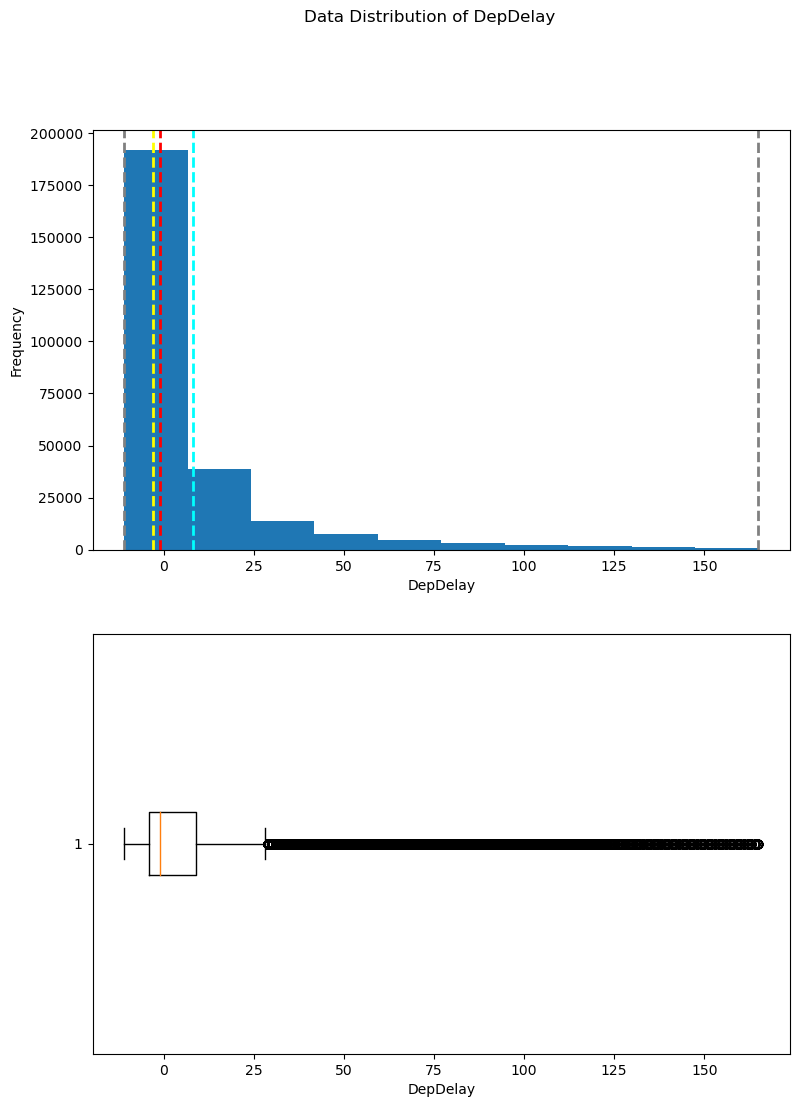

In [926]:
show_distribution("DepDelay")

Minimum: -75.00
Maximum: 280.00
Mean: 4.34
Median: -3.00
Mode: 0.00



C:\Users\Idris\AppData\Local\Temp\ipykernel_43744\2368959628.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


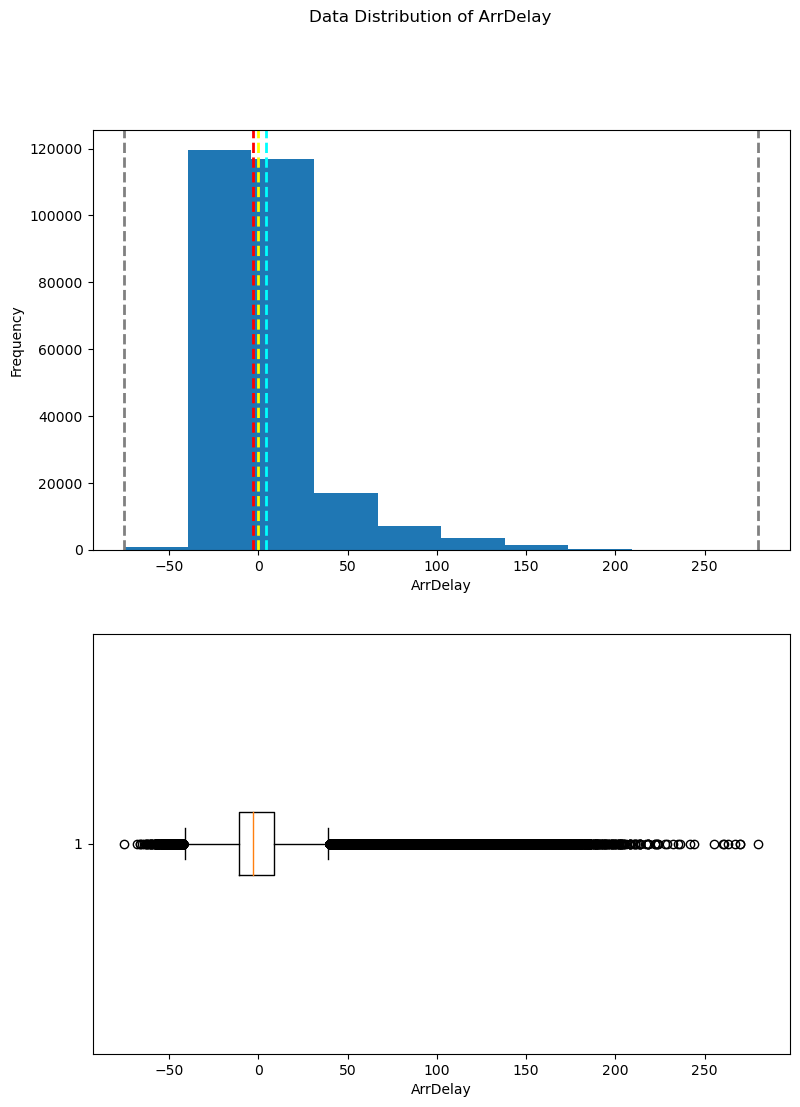

In [927]:
show_distribution("ArrDelay")

Summary Statistics

In [928]:
data.describe()

,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay
count,266319.000000,266319.000000,266319.000000,266319.000000,266319.000000
mean,1323.513794,8.222692,0.192994,1503.596946,4.338831
std,470.470799,24.922381,0.394649,492.815770,28.343394
min,1.000000,-11.000000,0.000000,1.000000,-75.000000
25%,919.000000,-4.000000,0.000000,1118.000000,-11.000000
50%,1316.000000,-1.000000,0.000000,1525.000000,-3.000000
75%,1720.000000,9.000000,0.000000,1915.000000,9.000000
max,2359.000000,165.000000,1.000000,2359.000000,280.000000


<AxesSubplot:>

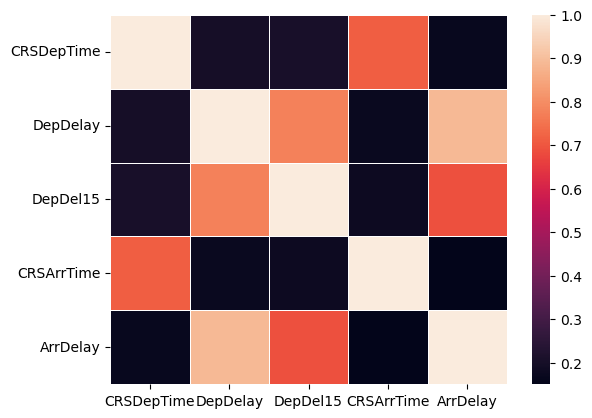

In [929]:
sns.heatmap(data.loc[:, data.columns != 'Year'].corr(), linewidth=0.5)

How do the carriers compare in terms of arrival delay performance?

In [930]:
arrdelay_perf = data[["ArrDelay", "Carrier"]].groupby("Carrier").mean().sort_values("ArrDelay")
arrdelay_perf

,ArrDelay
Carrier,
HA,-0.552819
AS,-0.100789
DL,0.190043
UA,2.118991
9E,2.573926
US,2.738820
AA,4.161088
OO,4.849161
VX,4.985457


Text(0.5, 1.0, 'Average Arrival Delay Time by Carrier')

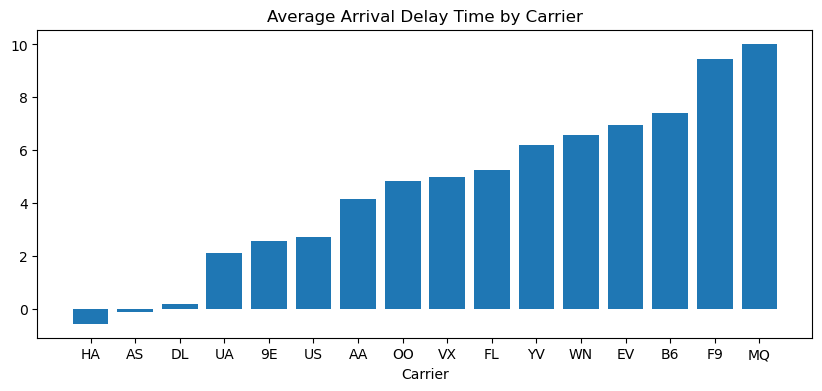

In [931]:
fig = plt.figure(figsize = (10,4))
plt.bar(arrdelay_perf.index, arrdelay_perf["ArrDelay"])
plt.xlabel("Carrier")
# plt.ylabel("Average Arrival Delay Time (Mins)")
plt.title("Average Arrival Delay Time by Carrier")

Is there a noticable difference in arrival delays for different days of the week?

In [932]:
arrdelay_perf2 = data[["ArrDelay", "DayOfWeek"]].groupby("DayOfWeek").mean().sort_values("ArrDelay")
arrdelay_perf2

,ArrDelay
DayOfWeek,
6,0.734631
2,2.520553
7,3.079486
3,4.608734
1,4.738541
5,6.169817
4,7.645016


Text(0.5, 1.0, 'Average Arrival Delay Time by Day of Week')

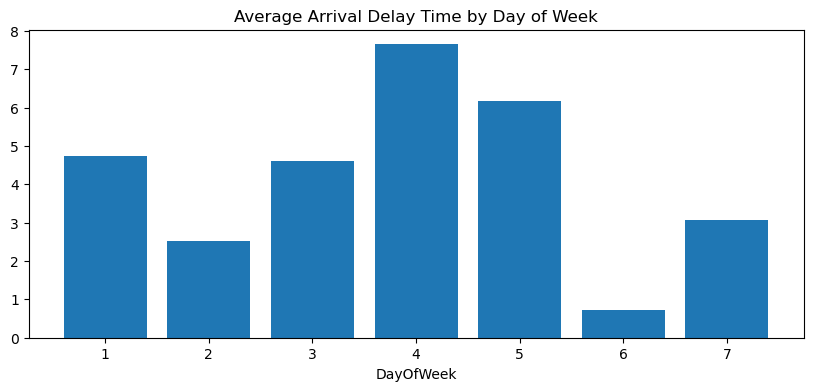

In [933]:
fig = plt.figure(figsize = (10,4))
plt.bar(arrdelay_perf2.index, arrdelay_perf2["ArrDelay"])
plt.xlabel("DayOfWeek")
# plt.ylabel("Average Arrival Delay Time (Mins)")
plt.title("Average Arrival Delay Time by Day of Week")

Which departure airport has the highest average departure delay?

In [934]:
arrdelay_perf3 = data[["ArrDelay", "DestAirportName"]].groupby("DestAirportName").mean().sort_values("ArrDelay", 
                                                                                                     ascending= False)
print("{} has the highest average departure delay".format(arrdelay_perf3.index[0]))

San Francisco International has the highest average departure delay


Do late* departures tend to result in longer arrival delays than on-time departures?

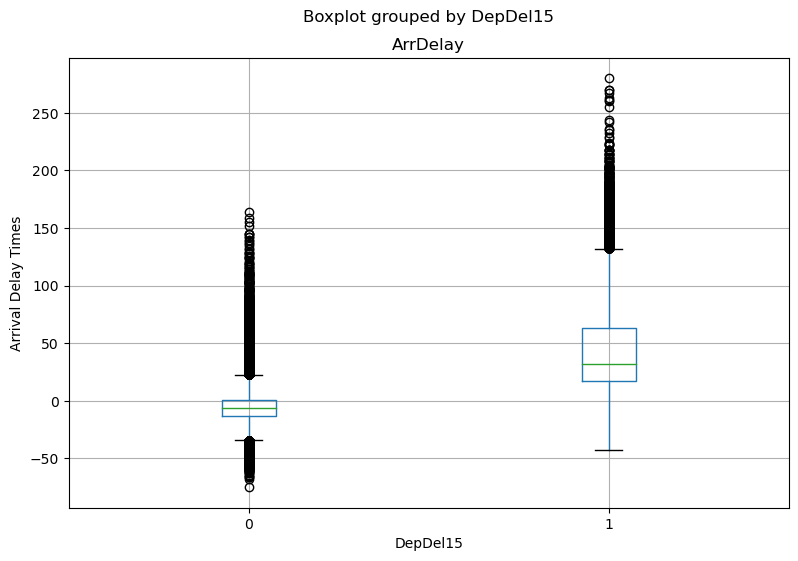

In [935]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
data.boxplot(column = 'ArrDelay', by = "DepDel15", ax = ax)
# ax.set_title('DepDel15')
ax.set_ylabel("Arrival Delay Times")
plt.show()

As seen, Yes, late departures tend to result in longer arrival delays

In [936]:
arrdelay_perf4 = data[["ArrDelay", "DepDel15"]].groupby("DepDel15").mean().sort_values("ArrDelay", 
                                                                                                     ascending= False)

Text(0.5, 1.0, 'Average Arrival Delay Time by Day of Week')

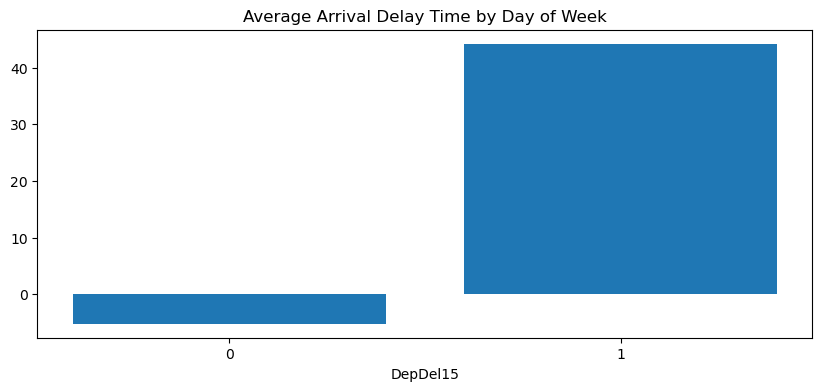

In [937]:
fig = plt.figure(figsize = (10,4))
plt.bar(arrdelay_perf4.index, arrdelay_perf4["ArrDelay"])
plt.xlabel("DepDel15")
plt.xticks([0, 1])
# plt.ylabel("Average Arrival Delay Time (Mins)")
plt.title("Average Arrival Delay Time by Day of Week")

Which route (from origin airport to destination airport) has the most late* arrivals?*

To do this, lets merge the origin and destination airport as a new column

In [938]:
data["OriDest"] = data["OriginAirportName"] + " - " + data["DestAirportName"]

In [939]:
arrdelay_perf5 = data[["ArrDelay", "OriDest"]].groupby("OriDest").sum().sort_values("ArrDelay", 
                                                                                                     ascending= False)

print("{} has the most late arrivals".format(arrdelay_perf5.index[0]))

Los Angeles International - San Francisco International has the most late arrivals


Which route has the highest average arrival delay?

In [940]:
arrdelay_perf6 = data[["ArrDelay", "OriDest"]].groupby("OriDest").mean().sort_values("ArrDelay", 
                                                                                                     ascending= False)

print("{} has the highest average arrival delay".format(arrdelay_perf6.index[0]))

Pittsburgh International - Raleigh-Durham International has the highest average arrival delay
